In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import splusdata

import seaborn as sns; sns.set()
sns.set_style("dark")

In [2]:
table = pd.read_csv("tables_photometric/LS_SPLUS-iDR4_match.csv", usecols=['type', 'PROB_GAL', 'RA_2', 'DEC_2',
                                                                          'r_petro', 'zml', 'ID', 'ra_1', 'dec_1'])

In [3]:
LStype = table["type"]
probgal = table["PROB_GAL"]
ra_SP = table["RA_2"]
dec_SP = table["DEC_2"]
ra_LS = table["ra_1"]
dec_LS = table["dec_1"]
rpetro = table["r_petro"]
zml = table["zml"]
ids = table["ID"]

In [4]:
#Defining the center of Hydra (in degress) --> from NED 
ra_0 = 159.17
dec_0 = -27.524

#radius of Hydra (R200)
radius = 1.5744

#calculating distances
def dist(ra, dec):
    return np.sqrt((ra - ra_0)**2 + (dec - dec_0)**2)

In [5]:
distance = dist(ra_LS, dec_LS)

### All Hydra data from S-PLUS and Legacy Survey

In [ ]:
table_SP = pd.read_csv("tables_photometric/Hydra_iDR4.csv", usecols=['RA', 'DEC', 'ID'])
table_LS = pd.read_csv("tables_photometric/legacy-survey-data/LS_Hydra_1R200-1.csv", usecols=['ra', 'dec'])

In [ ]:
ra_SP_all = table_SP["RA"]
dec_SP_all = table_SP["DEC"]
ids_all = table_SP["ID"]

ra_LS_all = table_LS["ra"]
dec_LS_all = table_LS["dec"]

In [ ]:
distance_SP = dist(ra_SP_all, dec_SP_all)
distance_LS = dist(ra_LS_all, dec_LS_all)

print("Number of objects inside 1R200 (S-PLUS): ", np.sum(distance_SP < radius))
print("Number of objects inside 1R200 (Legacy): ", np.sum(distance_LS < radius))

#### The regions I tried to downlod data from Legacy Survey (squares and circles)

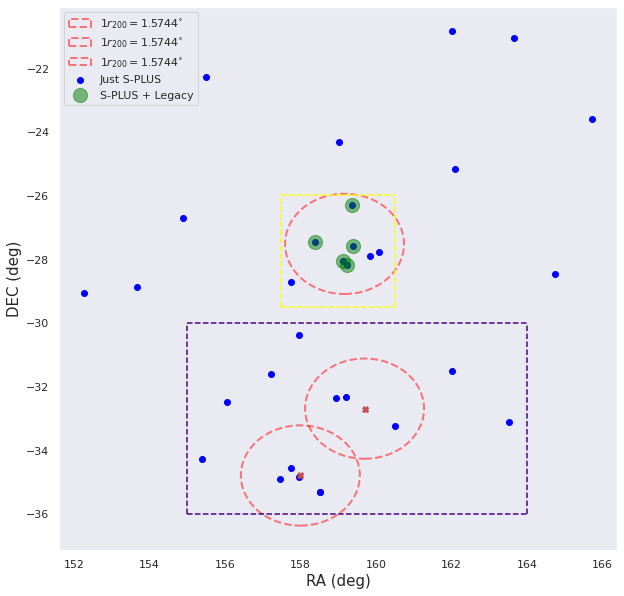

In [76]:
galaxies_SP_all = np.isin(ids_all, galaxies_upto13)
galaxies_intersection = np.isin(ids, galaxies_upto13)

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.scatter(ra_SP_all[galaxies_SP_all], dec_SP_all[galaxies_SP_all], marker='o', color='blue', label="Just S-PLUS")
ax.scatter(ra_LS[galaxies_intersection], dec_LS[galaxies_intersection], marker='o', 
               color='green', s=200.0, alpha=0.5, label="S-PLUS + Legacy")

OneR200 = plt.Circle((ra_0, dec_0), radius, linestyle='--', edgecolor='red', facecolor="None", 
                         lw=2, label=r'$1 r_{200} = 1.5744^{\circ}$', alpha=0.5)
ax.add_patch(OneR200)

ax.set_ylabel("DEC (deg)", fontsize=15)
ax.set_xlabel("RA (deg)", fontsize=15)

ax.vlines(x=155, ymin=-36, ymax=-30, linestyle='--', color="indigo")
ax.vlines(x=164, ymin=-36, ymax=-30, linestyle='--', color="indigo")
ax.hlines(y=-36, xmin=155, xmax=164, linestyle='--', color="indigo")
ax.hlines(y=-30, xmin=155, xmax=164, linestyle='--', color="indigo")

ax.vlines(x=157.5, ymin=-29.5, ymax=-26, linestyle='--', color="yellow")
ax.vlines(x=160.5, ymin=-29.5, ymax=-26, linestyle='--', color="yellow")
ax.hlines(y=-29.5, xmin=157.5, xmax=160.5, linestyle='--', color="yellow")
ax.hlines(y=-26, xmin=157.5, xmax=160.5, linestyle='--', color="yellow")

#Essa região aqui que falta baixar
ax.plot(158, -34.8, 'rX')
OneR200_2 = plt.Circle((158, -34.8), radius, linestyle='--', edgecolor='red', facecolor="None", 
                         lw=2, label=r'$1 r_{200} = 1.5744^{\circ}$', alpha=0.5)
ax.add_patch(OneR200_2)

ax.plot(159.7, -32.7, 'rX')
OneR200_3 = plt.Circle((159.7, -32.7), radius, linestyle='--', edgecolor='red', facecolor="None", 
                         lw=2, label=r'$1 r_{200} = 1.5744^{\circ}$', alpha=0.5)
ax.add_patch(OneR200_3)

ax.legend()

### What is the PROB_GAL (from S-PLUS) of objects with type='PSF' in Legacy Survey?

Text(0.5, 1.0, 'PROB_GAL -- galaxies in Legacy Survey')

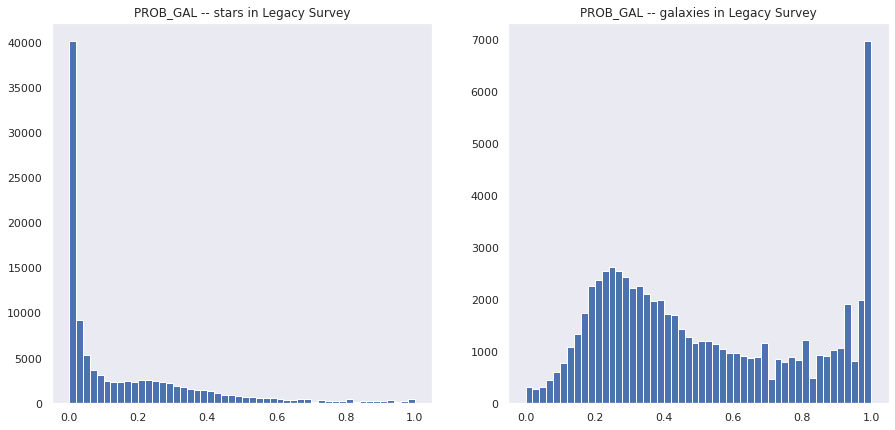

In [4]:
stars_LS = (LStype == 'PSF')
galaxies_LS = ~(LStype == 'PSF')

fig, axs = plt.subplots(1, 2, figsize=(15, 7))
axs[0].hist(probgal[stars_LS], bins=50)
axs[0].set_title("PROB_GAL -- stars in Legacy Survey")

axs[1].hist(probgal[galaxies_LS], bins=50)
axs[1].set_title("PROB_GAL -- galaxies in Legacy Survey")

### What are the object types in Legacy Survey for objects with prob_gal < 0.7 in S-PLUS?

Text(0.5, 1.0, 'object type (Legacy Survey) -- galaxies in S-PLUS')

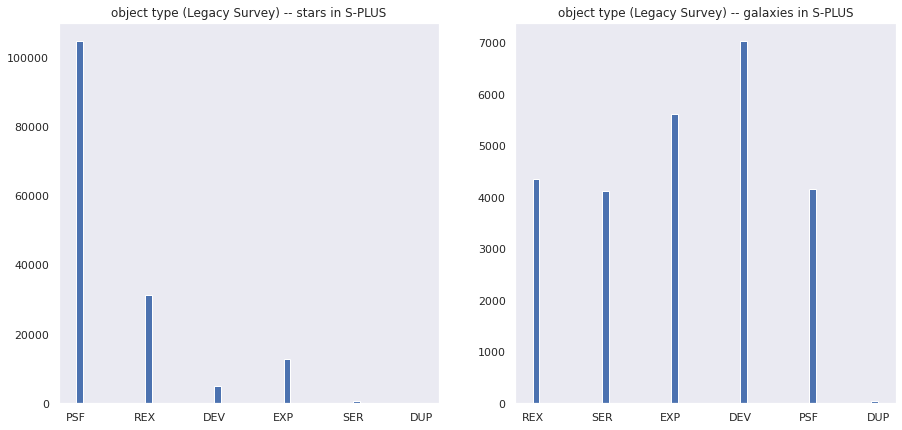

In [5]:
stars_SP = ~(probgal > 0.7)
galaxies_SP = (probgal > 0.7)

fig, axs = plt.subplots(1, 2, figsize=(15, 7))
axs[0].hist(LStype[stars_SP], bins=50)
axs[0].set_title("object type (Legacy Survey) -- stars in S-PLUS")

axs[1].hist(LStype[galaxies_SP], bins=50)
axs[1].set_title("object type (Legacy Survey) -- galaxies in S-PLUS")

### Plot images of objects classified as stars by Legacy Survey

In [ ]:
index_stars = ra[stars_LS].index

In [ ]:
conn = splusdata.connect('elosch', '@Hydra-Kentaurus1987')
fig, axs = plt.subplots(6, 6, figsize=(20, 14), constrained_layout = True)
for ax, index in zip(axs.ravel(), stars_LS):
    img = conn.twelve_band_img(ra[index_stars], dec[index_stars], radius=500, noise=0.15, saturation=0.15)
    ax.imshow(img)
    ax.axis('off')

    tx = ax.text(2, 35, str(index), color='white', verticalalignment='center', fontsize=25)

### What are the Legacy Survey types and probgals for objects I already visually selected as galaxies?

In [6]:
#The ids of the galaxies I selected visually up to r_petro 13
galaxies_upto13 = ['iDR4_3_HYDRA-0080_0016917', 'iDR4_3_HYDRA-0051_0046392',
 'iDR4_3_SPLUS-n18s11_0005169', 'iDR4_3_HYDRA-0071_0032896',
 'iDR4_3_HYDRA-D-0001_0049879', 'iDR4_3_HYDRA-0075_0049588',
 'iDR4_3_HYDRA-0050_0061079', 'iDR4_3_HYDRA-0044_0047366',
 'iDR4_3_SPLUS-n16s08_0002301', 'iDR4_3_HYDRA-0033_0044137',
 'iDR4_3_HYDRA-0036_0051736', 'iDR4_3_HYDRA-0072_0047996',
 'iDR4_3_SPLUS-n17s10_0044677', 'iDR4_3_HYDRA-0085_0055184',
 'iDR4_3_HYDRA-0064_0056439', 'iDR4_3_SPLUS-n17s04_0002573',
 'iDR4_3_HYDRA-0073_0035626', 'iDR4_3_HYDRA-0073_0036374',
 'iDR4_3_HYDRA-0083_0059368', 'iDR4_3_HYDRA-D-0001_0010332',
 'iDR4_3_HYDRA-D-0001_0070357', 'iDR4_3_HYDRA-0048_0015339',
 'iDR4_3_HYDRA-0016_0014146', 'iDR4_3_HYDRA-0045_0039429',
 'iDR4_3_HYDRA-0045_0041941', 'iDR4_3_HYDRA-0045_0071634',
 'iDR4_3_HYDRA-0045_0049794', 'iDR4_3_HYDRA-D-0003_0092076',
 'iDR4_3_HYDRA-0028_0034942', 'iDR4_3_HYDRA-0044_0005592',
 'iDR4_3_HYDRA-0046_0063658', 'iDR4_3_HYDRA-D-0002_0029847']

#These are the conditions I used to visually select the galaxies from S-PLUS data
#(I cannot do this analysis for objects I didn't inspected)
mask_stars = (zml > 0.0) & (zml < 0.05) & (distance < 5*radius) & (rpetro < 13) & ~(np.isin(ids, galaxies_upto13))
mask_galaxies = (zml > 0.0) & (zml < 0.05) & (distance < 5*radius) & (rpetro < 13) & (np.isin(ids, galaxies_upto13))

In [7]:
print("Number of stars selected:", np.sum(mask_stars))
print("Number of galaxies selected:", np.sum(mask_galaxies))

#Aparently two of the seven galaxies inside 1R200 (see plot above) were not matched by any source in Legacy

Number of stars selected: 157
Number of galaxies selected: 5


Text(0.5, 1.0, 'object type (Legacy Survey) -- visual galaxies up to rpetro 13')

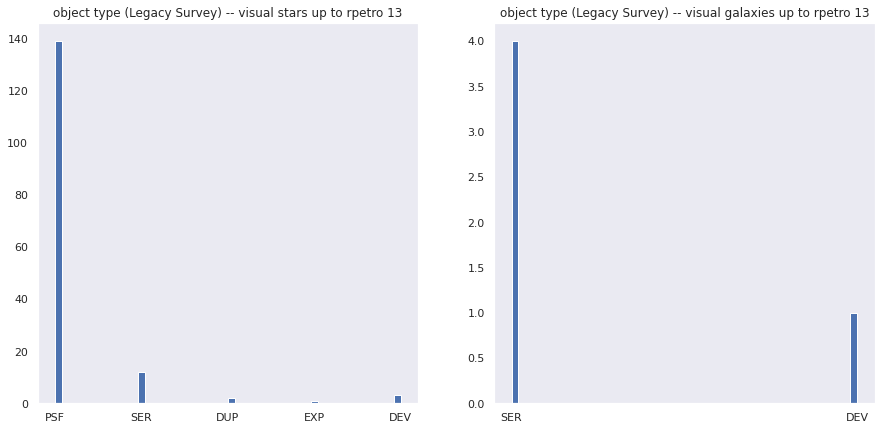

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
axs[0].hist(LStype[mask_stars], bins=50)
axs[0].set_title("object type (Legacy Survey) -- visual stars up to rpetro 13")

axs[1].hist(LStype[mask_galaxies], bins=50)
axs[1].set_title("object type (Legacy Survey) -- visual galaxies up to rpetro 13")

Text(0.5, 1.0, 'PROB_GAL -- visual galaxies up to rpetro 13')

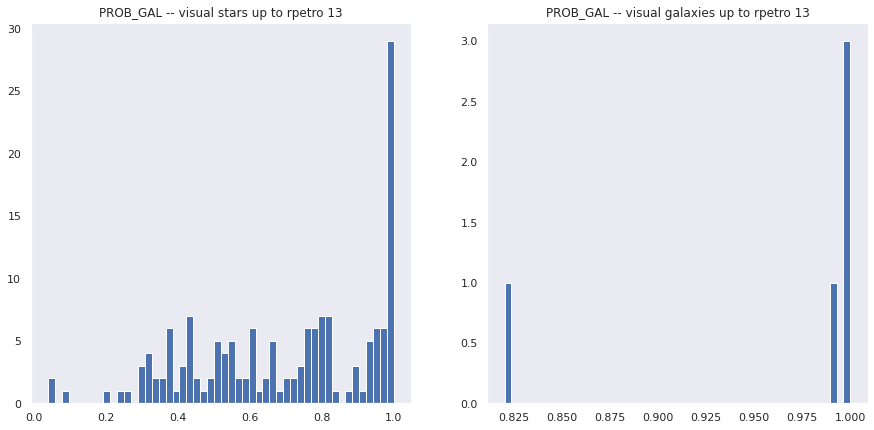

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
axs[0].hist(probgal[mask_stars], bins=50)
axs[0].set_title("PROB_GAL -- visual stars up to rpetro 13")

axs[1].hist(probgal[mask_galaxies], bins=50)
axs[1].set_title("PROB_GAL -- visual galaxies up to rpetro 13")

### Looking at objects selected as galaxies by Legacy and S-PLUS in Simbad

In [18]:
galaxies_LS = ~(LStype == 'PSF') & (rpetro < 15)

for index in ra_LS[galaxies_LS].index:
    print(ra_LS[index], dec_LS[index]) 

157.76271052832178 -28.307244234071597
157.88100799038466 -27.947138443951207
157.66056536149034 -27.59281244897811
158.10316103631507 -28.72773181512864
157.9773836918542 -28.62711071543364
158.185442577391 -28.60982511253221
158.2946037637036 -28.77386956951561
158.5156166239578 -28.62273827692029
158.5688044034741 -28.68095402504585
157.9503935349913 -28.312984236213424
158.66144138079986 -28.58334640449062
158.648565313678 -28.56819189117117
158.6476677254825 -28.49780216756221
159.08131909085768 -28.90608559628837
158.68599881995883 -28.573513427819755
158.7105805596994 -28.583031739303813
158.68832149572083 -28.576446338185715
158.7118532507516 -28.512682155918
158.6977344930562 -28.496353808937112
158.70429884505458 -28.41753557114474
159.42778709861113 -28.60404413978471
158.45185420314462 -28.004548919675425
158.5278983011205 -28.04204475684385
158.01747666930078 -27.70704074402377
158.47394801834582 -27.829626707050064
158.50283564249594 -27.72937937061953
158.56024436458128 

In [15]:
galaxies_SP = (probgal > 0.7) & (rpetro < 15)

for index in ra_SP[galaxies_SP].index:
    print(ra_SP[index], dec_SP[index]) 

158.43068875183732 -28.94099277126342
158.60665298149632 -28.99099269011416
158.64515670846882 -29.01190147685729
159.37287569402318 -29.078386959652228
157.5792832428928 -28.19750851737815
157.7627359750571 -28.307257060678065
157.87380630725465 -28.00204295575975
157.66068654869582 -27.59289551367649
157.5558496859352 -27.519803224832
157.8098647632229 -27.639176612882974
157.8267444807072 -27.64464345996584
157.8351027753402 -27.639766989315888
158.1011168780712 -28.73853452074616
158.1007890525078 -28.73368793598627
158.0978224245722 -28.727673968334773
158.1031244163069 -28.727668553833617
157.97747471110037 -28.627177710976053
158.1855464706533 -28.61003251215952
158.28722202615177 -28.80838434981609
158.5105078027525 -28.599652497201653
158.01642447593625 -28.4645841812411
158.43920741440098 -28.4685954743338
158.66144186267977 -28.58335365080692
158.64858280144736 -28.5682284126767
158.63834451061928 -28.48816505293008
158.64749915866554 -28.497725849258515
158.64121161246825 -

### Still have to do:
i) Have a look at the photoflags from S-PLUS <br>
ii) Look if, when I did the visual inspection, I was really looking at objects in the very center of the image <br>
iii) Come to a conclusion about how much Legacy Survey star-galaxy classification can help us <br>
iv) Do I still need to make the visual inspection or not? Probably I do, in order to use it in a reinforcement learning algorithm. Have to see this with Laerte <br>